# Two simple test problems on $S^2$
On $S^2$ we can use local coordinates $(\phi,\theta)$ where $\phi$ is elevation intended as the angle with the $xy$-plane, $-\tfrac{\pi}{2}\leq\phi\leq\tfrac{\pi}{2}$, and $\theta\in[0,2\pi)$ is the azimuth.
We could think of test problems in which the two coordinates are completely decoupled.
## First problem
The first possibility we consider is

$$
\begin{array}{lcl}
\dot{\phi} = \lambda\phi\\
\dot{\theta} = 1
\end{array}
$$
where we take $\lambda$ to be real.
The exact solution is $\phi(t) = e^{\lambda t}\phi_0$ and $\theta(t)=\theta_0+t$.

## Second problem
The second option we consider is

$$
\begin{array}{lcl}
\dot{\phi} = \lambda\phi\\
\dot{\theta} = \mu\theta
\end{array}
$$

with exact solution $\phi(t) = e^{\lambda t}\phi_0$ and $\theta(t) = e^{\mu t}\theta_0$


In [1]:
import numpy as np
# import autograd.numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.optimize import fsolve
from autograd import jacobian

[ 0.1207779  -0.76590294]


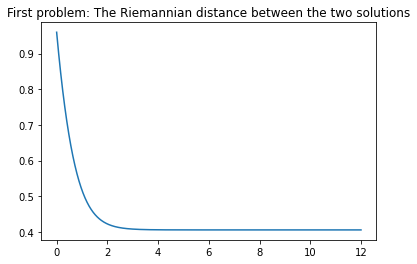

In [2]:
lam = -1
t = np.linspace(0,12,601)
phi0=np.pi/2*(2*np.random.rand(2)-1)
theta0=2*np.pi*np.random.rand(2)

phi = np.outer(np.exp(lam*t), phi0)
# print(phi.shape)
print(phi[0,:])
theta = np.zeros_like(phi)
theta[:,0]=t+theta0[0]
theta[:,1]=t+theta0[1]

X = np.cos(phi)*np.cos(theta)
Y = np.cos(phi)*np.sin(theta)
Z = np.sin(phi)
 
nrms=np.linalg.norm(np.array([X[:,1]-X[:,0],Y[:,1]-Y[:,0],Z[:,1]-Z[:,0]]),axis=0)
dist = 2*np.arcsin(nrms/2)
plt.plot(t,dist)
plt.title('First problem: The Riemannian distance between the two solutions')
plt.show()

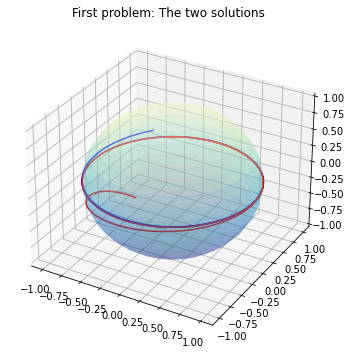

In [3]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
#r = 0.05
u, v = np.mgrid[0: 2 * np.pi: 30j, 0: np.pi: 20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap = plt.cm.YlGnBu_r, alpha=0.3)
#ax.plot_surface(x, y, z)

ax.plot(X[:,0],Y[:,0],Z[:,0],'blue')
ax.plot(X[:,1],Y[:,1],Z[:,1],'red')
plt.title('First problem: The two solutions')
plt.show()

[ 0.88476708 -1.21630038]
[2.39330596 5.04851127]


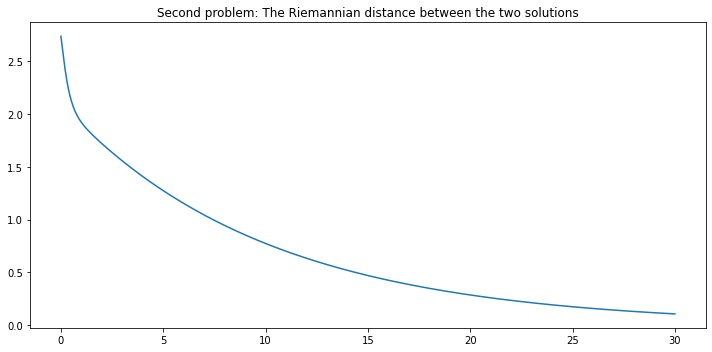

In [4]:
# The second problem
T=30
npts=601
lam = -0.1
mu = -2
t = np.linspace(0,T,npts)
phi0=np.pi/2*(2*np.random.rand(2)-1)
theta0=2*np.pi*np.random.rand(2)

phi = np.outer(np.exp(lam*t), phi0)
# print(phi.shape)
print(phi[0,:])
theta = np.outer(np.exp(mu*t), theta0)
print(theta[0,:])

X = np.cos(phi)*np.cos(theta)
Y = np.cos(phi)*np.sin(theta)
Z = np.sin(phi)

nrms=np.linalg.norm(np.array([X[:,1]-X[:,0],Y[:,1]-Y[:,0],Z[:,1]-Z[:,0]]),axis=0)
dist = 2*np.arcsin(nrms/2)
plt.plot(t,dist)
plt.title('Second problem: The Riemannian distance between the two solutions')
plt.show()

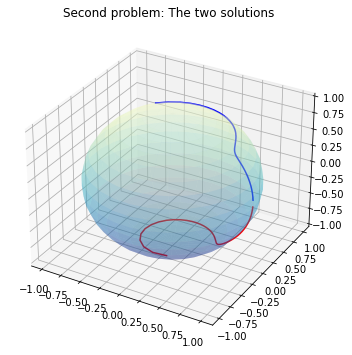

phi0= [ 0.88476708 -1.21630038]
theta0= [2.39330596 5.04851127]


In [5]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
#r = 0.05
u, v = np.mgrid[0: 2 * np.pi: 30j, 0: np.pi: 20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap = plt.cm.YlGnBu_r,alpha=0.3)
#ax.plot_surface(x, y, z)

ax.plot(X[:,0],Y[:,0],Z[:,0],'blue')
ax.plot(X[:,1],Y[:,1],Z[:,1],'red')
plt.title('Second problem: The two solutions')
plt.show()
print('phi0=',phi0)
print('theta0=',theta0)

## Analysis of the log-norm on $S^2$
Suppose that a vector field is expressed in local coordinates as $Y= Y^1\partial_1 + Y^2\partial_2$ 
where $\partial_1 = \partial_\phi,\ \partial_2 = \partial_\theta$. 
Its Jacobian matrix is denoted $B=B(Y^1,Y^2)$. We have found that the contractivity of such a problem amounts to studying when the quantity

$$\mu_g(L(Y))=  \lambda_{\max}\left[ \tfrac12 (GL(Y)G^{-1}+L(Y)^T)\right]$$

is non-positive. Here $G$ is the metric tensor with respect to the coordinates and $L(Y)$ is the
matrix of the linear map $X\mapsto \nabla_X Y$ expressed in the same coordinates. In spherical coordinates it is well-known that

$$
    G =\left[ \begin{array}{cc} 1 & 0 \\ 0 & \cos^2\phi \end{array} \right]
$$
One can calculate the Christoffel symbols

$$
\Gamma^1_{ij} = \left[\begin{array}{cc} 0 & 0\\ 0 & \sin\phi\cos\phi\end{array}\right],\qquad
\Gamma^2_{ij} = \left[\begin{array}{cc} 0 & -\tan\phi\\ -\tan\phi & 0\end{array}\right]
$$

The connection therefore takes the following expression in spherical coordinates

$$
\nabla_X Y = \nabla_X (Y^i\partial_i) = X(Y^i)\partial_i + X^j Y^i\nabla_{\partial_j}\partial_i
$$

The first term is simply $X^j\partial_j(Y^i)\partial_i = (B X)^i$. In the second we use the Christoffel symbols
$\nabla_{\partial_j}\partial_i = \Gamma^m_{ij}\partial_m$ to get $X^j Y^i\nabla_{\partial_j}\partial_i=(AX)^m$ where $A^m_j = \Gamma^m_{ij} Y^i$. We can conclude that in the above expression $L=L(Y)=A+B$.
We calculate

$$
    A = \left[\begin{array}{cc}0 & Y_2\sin\phi\cos\phi \\ -Y_2\tan\phi & -Y_1 \tan\phi  \end{array}\right]
    \qquad\Rightarrow\qquad
    \tfrac12(GAG^{-1}+A^T) = \left[\begin{array}{cc} 0 & 0 \\ 0 & -Y_1\tan\phi\end{array} \right]
$$

and we also find

$$
 \tfrac12\left(GBG^{-1}+B^T\right) = \left[\begin{array}{cc} b_{11} & \tfrac12(\frac{b_{12}}{\cos^2\phi}+b_{21})\\
 \tfrac12(\cos^2\phi\; b_{21} + b_{12}) & b_{22} \end{array}\right]
$$

So finally we obtain the matrix $\tfrac12(GL(Y)G^{-1}+L(Y)^T)$

$$
    \left[\begin{array}{cc} b_{11} & \tfrac12(\frac{b_{12}}{\cos^2\phi}+b_{21})\\
 \tfrac12(\cos^2\phi\; b_{21} + b_{12}) & b_{22}  -Y_1\tan\phi \end{array}\right]
$$



### The application to the second test problem

The test problems above are decoupled in spherical coordinates, meaning that in the second of them $B=\text{diag}(\lambda,\mu)$ so that we need to analyse the eigenvalues of the matrix

$$
    \left[\begin{array}{cc} \lambda & 0\\
 0 & \mu -\lambda\phi\tan\phi \end{array}\right]
$$

For the problem to be contractive, we need $\lambda\leq 0$ and

$$
\phi\tan\phi \leq  \frac{\mu}{\lambda} 
$$

so it requires $\mu\leq 0$. The solutions tend to $(\phi,\theta)=(0,0)$ with a monotonic decrease in both variables' absolute value. Thus, if $\phi_0$ is such that $\phi_0\tan\phi_0 \leq  \frac{\mu}{\lambda}$, then the solution will remain contractive for all times.

## Lie group integrators

### Representing vector fields as in LGMs
It is convenient to be able to express vector fields in cartesian coordinates using cross products. We begin by writing the coordinate vector fields $\partial_1=\partial_\phi$ and $\partial_2=\partial_\theta$ in the cartesian form

$$
\partial_\phi = 
\left[
\begin{array}{c} -\sin\phi\cos\theta\\ -\sin\phi\sin\theta \\ \cos\phi \end{array}
\right]
= v_\phi\times y =
\left[\begin{array}{c}\sin\theta\\ - \cos\theta\\ 0 \end{array}\right] \times 
\left[\begin{array}{c}\cos\phi\cos\theta \\ \cos\phi\sin\theta \\ \sin\phi\end{array}\right],\quad
\partial_\theta =
\left[
\begin{array}{c} -\cos\phi\sin\theta\\ \cos\phi\cos\theta \\ 0 \end{array}
\right]
= v_\theta\times y =
\left[\begin{array}{c}0 \\ 0\\ 1 \end{array}\right] \times 
\left[\begin{array}{c}\cos\phi\cos\theta \\ \cos\phi\sin\theta \\ \sin\phi\end{array}\right]
$$

This allows us to write systems on $S^2$ in a form which is suitable for Lie group integrators where $SO(3)$ represented as $3\times 3$ skew-symmetric matrices is acting on $\mathbb{R}^3$.
So we begin with spherical coordinates $s=(\phi,\theta)$ and consider 
$\dot{s}=f_\phi(s)\partial_\phi + f_\theta(s)\partial_\theta$. Then we use the standard spherical-to-cartesian transformation

$$
  s\mapsto y=\Upsilon(s):\ (\phi,\theta) \mapsto (\cos\phi\cos\theta, \cos\phi\sin\theta, \sin\phi)
$$

We then get

$$
    \dot{y} = 
    \left[
    \begin{array}{cc}
    0                 &  -f_\theta         & -\cos\theta\, f_\phi \\
    f_\theta          &  0                 &  -\sin\theta\, f_\phi    \\
    \cos\theta\, f_\phi & \sin\theta\, f_\phi  &      0   
    \end{array}
    \right]
    \cdot y
$$









In [6]:
from audioop import lin2adpcm
import mailbox

def VectorField(x,y0,h):
    s = cart2spherical(x)
    y1 = expm(h*np.matrix([[0, -mu*s[1], -np.cos(s[1])*lam*s[0]],
                           [mu*s[1], 0, -np.sin(s[1])*lam*s[0]],
                           [np.cos(s[1])*lam*s[0], np.sin(s[1])*lam*s[0], 0]]))@y0
    return y1

def LieEulerStep(s0,s1,h):
    phi0, theta0 = s0
    f_theta = mu*np.sin(theta0)
    f_phi = lam*phi0
    A = np.zeros((3,3))
    A[0,1] = -f_theta
    A[1,0] = -A[0,1]
    A[0,2] = -np.cos(theta0)*f_phi
    A[2,0] = -A[0,2] 
    A[1,2] = -np.sin(theta0)*f_phi
    A[2,1] = -A[1,2]
    if s1.size == 2:
        y0 = spherical2cart(s1)
    else:
        y0 = s1
    y1 = expm(h*A)@y0
    s1 = cart2spherical(y1)
    return s1, y1


# def NewtonStep(s0,j,h,maxIter,atol,rtol):
#     y0 = spherical2cart(s0)
#     s1, y1 = LieEulerStep(s0,s0,h)
#     dy = np.zeros_like(y0)
#     for iter in range(maxIter):
#         s1, y11 = LieEulerStep(s1,s0,h)
#         res = - y1 + y11
#         print(np.linalg.norm(res))
#         if np.linalg.norm(res) < rtol*(np.linalg.norm(dy))+atol:
#             break
#         S = j(s0,s1,h)
#         dy = -np.linalg.solve(S, res)
#         y1 = y1 + expm(h*skew(dy))@y0
#         s1 = cart2spherical(y1)
#     return s1, y1


def FixedPointIteration(s0,s1,h,maxIter,tol):
    # s1, y1 = LieEulerStep(s0,s0,h)
    for iter in range(maxIter):
        s1, y1 = LieEulerStep(s1,s0,h)
        sNew, yNew = LieEulerStep(s1,s0,h)
        if np.linalg.norm(y1-yNew)<tol:
            # print('converge after ' + str(iter))
            break
    
    # if iter == (maxIter-1):
        # print(str(h) + ' not converged!')
    return s1, y1

def exactSolution(s0,t):
    phi0, theta0 = s0
    phi = np.exp(t*lam)*phi0
    # theta = np.exp(t*mu)*theta0
    theta = 2*np.arctan(1/(np.exp(-t*mu)*(1/np.tan(theta0/2))))
    return spherical2cart(np.array([phi,theta]))

def spherical2cart(s):
    return np.array([np.cos(s[0])*np.cos(s[1]), np.cos(s[0])*np.sin(s[1]),np.sin(s[0])])


def cart2spherical(y):
    try:
        np.linalg.norm(y) < 1 + 1e-6 or np.linalg.norm(y) > 1 - 1e-6
    except:
        raise Exception('Not on the sphere')
    return np.array([np.arcsin(y[2]), np.arctan2(y[1],y[0])])


def rdistance(y,z):
    return 2*np.arcsin(np.linalg.norm(y-z,2)/2)


def skew(v):
    return np.array([[0,-v[2],v[1]],[v[2],0,-v[0]],[-v[1],v[0],0]])


def ProjS2(p,q,t):
    return ((1-t)*p+t*q)/np.linalg.norm((1-t)*p+t*q)

positive eigenvalue!
Number of steps: 99 

positive derivative


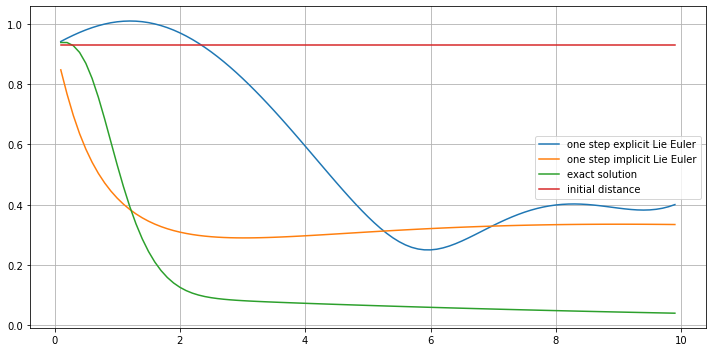

In [7]:
from turtle import color

phi0=np.pi/2*(2*np.random.rand(2)-1)
# theta0=2*np.pi*np.random.rand(2)
theta0=np.pi*np.random.rand(2)
mulam = mu/lam

r0 = np.array([phi0[0],theta0[0]])
s0 = np.array([phi0[1],theta0[1]])
y0 = spherical2cart(r0)
z0 = spherical2cart(s0)

eigMax = -1
# checking the initial condition
for timepar in np.linspace(0,1,10000):
    crrProj = ProjS2(y0,z0,timepar)
    crrPhi, crrTheta = cart2spherical(crrProj)
    # crrEig = mu-lam*crrPhi*np.tan(crrPhi)
    crrEig = mu*np.cos(crrTheta)-lam*crrPhi*np.tan(crrPhi)
    # print(crrEig)
    if crrEig>eigMax:
        eigMax=np.copy(crrEig)

if eigMax>0:
    print('positive eigenvalue!')


# h = 0.1
# h = np.arange(0.001,0.1, 0.001)
h = np.arange(0.1,10.0,0.1)
# N = int(T/h)
N = np.size(h)
time = np.linspace(0,T,N+1)
maxIt = 30
atol = 1e-10
rtol = atol
print('Number of steps:',N,"\n")

SS = np.zeros((2,2,N+1))
YY = np.zeros((2,3,N+1))
SSi = np.zeros((2,2,N+1))
YYi = np.zeros((2,3,N+1))
YYe = np.zeros((2,3,N+1))
RD = np.zeros((3,N+1))
DRD = np.zeros((N,))
SS[0,:,0] = r0
SS[1,:,0] = s0
YY[0,:,0] = y0
YY[1,:,0] = z0
SSi[0,:,0] = r0
SSi[1,:,0] = s0
YYi[0,:,0] = y0
YYi[1,:,0] = z0
YYe[0,:,0] = y0
YYe[1,:,0] = z0
RD[0,0] = rdistance(y0,z0)
RD[1,0] = rdistance(y0,z0)
RD[2,0] = rdistance(y0,z0)

JJ = jacobian(VectorField, 0)

my_fun = lambda x, y0, dt : - x + VectorField(x, y0, dt)

def NumDiff(f0,f,h):
    F = (f-f0)/h
    return F

for k in range(N):
    for j in range(2):
        SS[j,:,k+1], YY[j,:,k+1] = LieEulerStep(SS[j,:,0],SS[j,:,0],h[k])
        # SSi[j,:,k+1], YYi[j,:,k+1] = FixedPointIteration(SSi[j,:,0], SSi[j,:,k],h[k],maxIt,atol)
        YYi[j,:,k+1] = fsolve(my_fun, YYi[j,:,k], args=(YYi[j,:,0], h[k]))
        YYe[j,:,k+1] = exactSolution(SS[j,:,0],h[k])
    RD[0,k+1] = rdistance(YY[0,:,k+1],YY[1,:,k+1])
    RD[1,k+1] = rdistance(YYi[0,:,k+1],YYi[1,:,k+1])
    RD[2,k+1] = rdistance(YYe[0,:,k+1],YYe[1,:,k+1])
    DRD[k] = NumDiff(RD[1,k], RD[1,k+1], h[1]-h[0])

# print('Number of steps:',N,"\n")
# print('(phi0, theta0) = (' + str(phi0[0]) + ',' + str(theta0[0]) + ')')
# print('(phi0, theta0) = (' + str(phi0[1]) + ',' + str(theta0[1]) + ')')

if any(DRD[5:]>0):
    print('positive derivative')

# fig1 = plt.figure()
# plt.plot(h, DRD, color='red', label='derivative implicit Lie Euler distance function')
# plt.plot(h, np.zeros((N,)), color='green')
# plt.legend()
# plt.grid()

fig2 = plt.figure()
plt.plot(h, RD[0,1:], label='one step explicit Lie Euler')
plt.plot(h, RD[1,1:], label='one step implicit Lie Euler')
plt.plot(h, RD[2,1:], label='exact solution')
plt.plot(h, RD[0,0]*np.ones((N, )), label='initial distance')
plt.legend()
plt.grid()

plt.show()

In [8]:
# print(eigMax)
print('(phi0, theta0) = (' + str(phi0[0]) + ',' + str(theta0[0]) + ')')
print('(phi0, theta0) = (' + str(phi0[1]) + ',' + str(theta0[1]) + ')')
eigMax = 0
for timepar in np.linspace(0,1,100000):
    crrProj = ProjS2(y0,z0,timepar)
    crrPhi = cart2spherical(crrProj)[0]
    crrEig = mu-lam*crrPhi*np.tan(crrPhi)
    # print(crrEig)
    if crrEig>eigMax:
        eigMax=np.copy(crrEig)
    
print(eigMax)
print(lam)
print(mu)
print(YYi[:,:,1])

(phi0, theta0) = (-1.1188228397185302,2.6461029944975567)
(phi0, theta0) = (-1.009198989877959,0.2945363454701329)
0
-0.1
-2
[[-0.26303499  0.36062501 -0.89485317]
 [ 0.52479524  0.13127946 -0.84104439]]


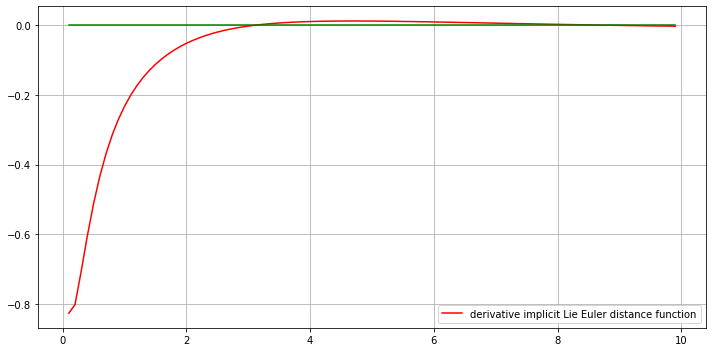

In [9]:
fig1 = plt.figure()
plt.plot(h, DRD, color='red', label='derivative implicit Lie Euler distance function')
plt.plot(h, np.zeros((N,)), color='green')
plt.legend()
plt.grid()

In [10]:
# plt.plot(time,RD[0,:], label='explicit Lie Euler')
# plt.plot(time,RD[1,:], label='implicit Lie Euler (fixed point iteration)')
# plt.plot(time[0:10], RD[0,0:10], label='explicit Lie Euler')
# plt.plot(time[0:10], RD[1,0:10], label='implicit Lie Euler (fixed point iteration)')
# plt.legend()
# plt.grid()
# plt.show()

In [11]:
# figN = plt.figure()
# axN = figN.add_subplot(projection = '3d')

# axN.plot_surface(x, y, z, cmap = plt.cm.YlGnBu_r,alpha=0.3)
# #ax.plot_surface(x, y, z)

# # axN.plot(YY[0,0,:],YY[0,1,:],YY[0,2,:],'blue')
# # axN.plot(YY[1,0,:],YY[1,1,:],YY[1,2,:],'red')
# for k in range(N):
#     axN.plot([YY[0,0,0], YY[0,0,k]],[YY[0,1,0], YY[0,1,k]], [YY[0,2,0], YY[0,2,k]],'blue')
#     axN.plot([YY[1,0,0], YY[1,0,k]],[YY[1,1,0], YY[1,1,k]], [YY[1,2,0], YY[1,2,k]],'red')
#     # axN.plot([YY[0,0,0], YY[1,0,0]],[YY[0,1,0], YY[1,1,0]], [YY[0,2,0], YY[1,2,0]],'blue')
#     # axN.plot([YY[0,0,k], YY[1,0,k]],[YY[0,1,k], YY[1,1,k]], [YY[0,2,k], YY[1,2,k]],'red')

# plt.title('Second problem: One time step size explicit Lie Euler')

# fig = plt.figure()
# ax = fig.add_subplot(projection = '3d')

# ax.plot_surface(x, y, z, cmap = plt.cm.YlGnBu_r,alpha=0.3)
# #ax.plot_surface(x, y, z)

# # axN.plot(YY[0,0,:],YY[0,1,:],YY[0,2,:],'blue')
# # axN.plot(YY[1,0,:],YY[1,1,:],YY[1,2,:],'red')
# for k in range(5):
#     # ax.plot([YYi[0,0,0], YYi[0,0,k]],[YYi[0,1,0], YYi[0,1,k]], [YYi[0,2,0], YYi[0,2,k]],'blue')
#     # ax.plot([YYi[1,0,0], YYi[1,0,k]],[YYi[1,1,0], YYi[1,1,k]], [YYi[1,2,0], YYi[1,2,k]],'red')
#     ax.plot([YYi[0,0,0], YYi[1,0,0]],[YYi[0,1,0], YYi[1,1,0]], [YYi[0,2,0], YYi[1,2,0]],'blue')
#     ax.plot([YYi[0,0,k], YYi[1,0,k]],[YYi[0,1,k], YYi[1,1,k]], [YYi[0,2,k], YYi[1,2,k]],'red')

# plt.title('Second problem: One time step size implicit Lie Euler')
# plt.show()

### Distance in spherical coordinates
One option is to just transform to cartesian coordinates, then take the familiar formula, the calculations are a bit messy.

$$
y_j = [\cos\phi_j\cos\theta_j, \cos\phi_j\sin\theta_j, \sin\phi_j],\quad j=1,2.
$$

Then 

$$
\|y_1-y_2\|^2 = -2\cos\phi_1\cos\phi_2\,\cos(\theta_1-\theta_2)-2\sin\phi_1\sin\phi_2 + 2
$$

Now the distance (as I know it) is $d:=d(y_1,y_2)=2\arcsin(\|y_1-y_2\|/2)$. Thus

$$
    \cos d = \cos(\theta_1-\theta_2)\cos\phi_1\cos\phi_2 + \sin\phi_1\sin\phi_2
$$




### Lie-Euler on the two-sphere and its relations to geodesics
$$
y_{n+1} = \exp(h \hat{f}(y_n))\cdot y_n
$$

where $f:\mathbb{R}^3\rightarrow\mathbb{R}^3$ and $\hat{f}(y)$ is the skew $3\times 3$ matrix defined by applying the hat-map to $f(y)$. One should note that in the differential equation above ($\dot{y}=f(y)\times y$), one can replace $f(y)$ by
$f(y)+\eta(y)\,y$ for any scalar function $\eta(y)$ without changing the problem.



We are interested now in *one* step and set $n=0$ $f_0=f(y_0)$ and let $\alpha = h\|f_0\|$.
The Rodrigues formula gives

$$
   y_{1} = y_0 + \frac{\sin \alpha}{\alpha}\, (hf_0\times y_0) + \frac{1-\cos\alpha}{\alpha^2}\,hf_0 \times (hf_0\times y_0)
$$

As discussed above, we could in particular replace $f(y)$ by $\bar{f}(y)=f(y)-y^Tf(y)\cdot y$, and in this case we would have $y^T\bar{f}(y)=0$ so that $\bar{f}(y)\in T_yS^2$. The unit vector $v=\frac{h\bar{f}_0}{\alpha}$ in Euler's method would then, together with $w=v\times y_0$ form an orthogonal frame. In fact, it then also holds that $v\times w = -y_0$. Plugging this into the Euler method above, we would get

$$
y_1 = (1-\cos\alpha) y_0 + \frac{\sin\alpha}{\alpha} h\bar{f}_0\times y_0
$$

As $h$ is varied, it would trace out a geodesic curve on $S^2$, $y_1=y(h)=\exp_{y_0}(hf_0)$.

Suppose $\bar{f}(y)$ is the map that generates geodesics by Lie-Euler, i.e. $\bar{f}(y)\in T_y S^2$.
Any other field $f(y)=\bar{f}(y)+\eta(y) y$ then satisfies

$$
\begin{align*}
    f(y) \times (f(y) \times y) & = (\bar{f}(y) +\eta(y)y) \times (\bar{f}(y)\times y)
    = \bar{f}(y) \times \bar{f}(y) \times y + \eta(y) y\times (\bar{f}(y)\times y) \\[2mm]
    &= -\|\bar{f}(y)\|^2\,y + \eta(y) y\times (\bar{f}(y)\times y) 
\end{align*}
$$

We get 

$$
y_1 = y_0 + \frac{\sin\alpha}{\alpha} (h\bar{f}_0\times y_0) + 
\frac{1-\cos\alpha}{\alpha^2}\big(-\bar{\alpha}^2 y_0 + \eta(y_0) h^2 y_0\times (\bar{f}_0\times y_0)\big)
$$


## Lie-Euler
It seems that the two-parameter family to study for Lie-Euler is

$$
c(t,\tau) = \exp(tX_{c_0(\tau)})\, c_0(\tau)
$$

In [12]:
# def f(y):
#     lam=-0.1
#     mu = -2
#     phi = np.arcsin(y[2])
#     theta = np.arctan2(y[1],y[0])
#     f_phi = lam*phi
#     f_theta = mu*theta
#     fv = np.array([np.sin(theta)*f_phi, -np.cos(theta)*f_phi, f_theta])
#     return fv


# y0 = 2*np.random.rand(3)-1
# y0 = y0/np.linalg.norm(y0)

# T=10
# N=100

# H=np.linspace(0,T,N+1)
# YN = np.zeros((3,N+1))
# f0 = f(y0)
# f0 = f0 - (y0.transpose()@f0)*y0
# print('y0t*f0=',y0.transpose()@f0)
# nf0=np.linalg.norm(f0)
# f0xy0 = np.cross(f0,y0)
# f0xf0xy0 = np.cross(f0,f0xy0)
# YN[:,0] = y0


# for k in range(N):
#     h=H[k+1]
#     alpha = h*nf0
#     YN[:,k+1] = y0+ np.sin(alpha)/alpha*h*f0xy0 + (1-np.cos(alpha))/alpha**2*h**2*f0xf0xy0 
    
# tarr = np.linspace(0,2*np.pi,N+1)
# v=f0xy0/np.linalg.norm(f0xy0)
# Ygeo = np.outer(y0,np.cos(tarr)) + np.outer(v,np.sin(tarr))


In [13]:
# fig_1 = plt.figure()
# ax_1 = fig_1.add_subplot(projection = '3d')

# ax_1.plot_surface(x, y, z, cmap = plt.cm.YlGnBu_r,alpha=0.3)
# #ax.plot_surface(x, y, z)

# ax_1.plot(y0[0],y0[1],y0[2],'ro')
# ax_1.plot(YN[0,:],YN[1,:],YN[2,:],'blue')
# ax_1.plot(Ygeo[0,:],Ygeo[1,:],Ygeo[2,:],'k')
# plt.title('Lie-Euler for various stepsizes')
# plt.show()


### Gradient Flow on $S^2$

Let's consider the following energy function on a sphere, $q\in S^2$
$$E(q)=\frac{1}{2}q^\top Dq$$
We consider the gradient and its projection on the tangent space $TS^2$
$$\text{grad}E(q)=\left(\mathbb{I}-qq^\top\right)Dq.$$

The equations leading the problem are
$$
\dot{q}=-\text{grad}E(q)=-Dq+2E(q)q
$$

where we choose
$$D=\begin{pmatrix}
a &0 &0\\
0 &a &0\\
0 &0 &c
\end{pmatrix}$$
ending up with the problem

$$\dot{q}=\begin{pmatrix}
2E(q)-a &0 &0\\
0 &2E(q)-a &0\\
0 &0 &2E(q)-c
\end{pmatrix}\cdot q$$


In order to write the problem as $\dot{y}=A(y)\cdot y$, with $A(y)$ skew symmetric, we manipulate the equations.
Let $f$ be the gradient of the energy. Then we have
$$\dot{y} = -(fy^\top-yf^\top)\cdot y$$
It is easy to verify that $(fy^\top-yf^\top)$ is skew symmetric by construction and that the right hand side is equivalent to the negative gradient.

9.800009800012277e-06
[-0.54308957  0.29351841 -0.7867024 ]
[ 0.62580061  0.18984276 -0.75652715]


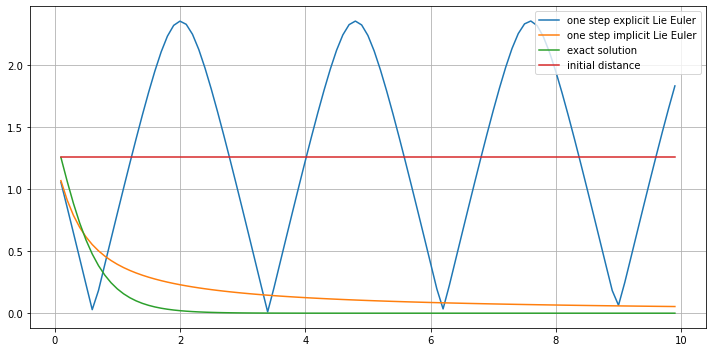

In [14]:
# initialization
I1 = np.random.rand(1)
I3 = np.random.rand(1)
if I1 > I3:
    tmp = np.copy(I3)
    I3 = np.copy(I1)
    I1 = np.copy(tmp)
I2 = np.copy(I1)
diag = np.array([1/I1, 1/I2, 1/I3]).reshape(3,)
# diag = np.array([4, 4, 1]).reshape(3,)
Inertia = np.diag(diag)

h = np.arange(0.1,10.0,0.1)
N = np.size(h)
nTime = 10000
time = np.linspace(h[0],h[-1],nTime)
dt = time[1]-time[0]
maxIt = 30
tol = 1e-12

phi0=-np.pi/4+(np.pi/4-1)*np.random.rand(2)
# theta0=2*np.pi*np.random.rand(2)
# theta0=np.pi*np.random.rand(2)
q = np.zeros((2,3,N+1))
qi = np.zeros((2,3,N+1))
qe = np.zeros((2,3,N+1))
RD = np.zeros((3,N+1))
DRD = np.zeros((N,))
q[0,:,0] = spherical2cart([phi0[0],theta0[0]])
q[1,:,0] = spherical2cart([phi0[1],theta0[1]])
qi[0,:,0] = np.copy(q[0,:,0])
qi[1,:,0] = np.copy(q[1,:,0])
qe[0,:,0] = np.copy(q[0,:,0])
qe[1,:,0] = np.copy(q[1,:,0])
RD[0,0] = rdistance(q[0,:,0],q[1,:,0])
RD[1,0] = rdistance(q[0,:,0],q[1,:,0])
RD[2,0] = rdistance(q[0,:,0],q[1,:,0])

print(dt)
print(q[0,:,0])
print(q[1,:,0])
# print(np.linalg.norm(q[0,:,0]))
# print(np.linalg.norm(q[1,:,0]))

def negSkwMatrix(x,D):
    f = ((np.eye(3)-x*np.transpose(x))@D)@x
    return f*np.transpose(x)-x*np.transpose(f)

def energy(x,D):
    return 0.5*np.transpose(x)@D@x

# def diffEq(x,D):
#     return -D+2*energy(x,D)*np.eye(3)

def LieEuler(x0,x,D,dt):
    x0 = x0.reshape(3,1)
    x = x.reshape(3,1)
    return expm(dt*(-negSkwMatrix(x,D)))@x0.reshape(3,)

my_fun = lambda x, x0, D, dt : - x + LieEuler(x0, x, D, dt)

tmpExact = np.zeros((2,3,nTime+1))
tmpExact[0,:,0] = np.copy(q[0,:,0])
tmpExact[1,:,0] = np.copy(q[1,:,0])
for cnt in range(nTime):
    for j in range(2):
        tmpExact[j,:,cnt+1] = fsolve(my_fun, tmpExact[j,:,cnt], args=(tmpExact[j,:,cnt], Inertia, dt))


for k in range(N):
    for j in range(2):
        q[j,:,k+1] = LieEuler(q[j,:,0],q[j,:,0],Inertia,h[k])
        qi[j,:,k+1] = fsolve(my_fun, qi[j,:,k], args=(qi[j,:,0], Inertia, h[k]))
        qe[j,:,k+1] = tmpExact[j,:,k*(nTime//N)]
    RD[0,k+1] = rdistance(q[0,:,k+1],q[1,:,k+1])
    RD[1,k+1] = rdistance(qi[0,:,k+1],qi[1,:,k+1])
    RD[2,k+1] = rdistance(qe[0,:,k+1],qe[1,:,k+1])
    DRD[k] = NumDiff(RD[1,k], RD[1,k+1], h[1]-h[0])

# print(np.linalg.norm(q[0,:,:], axis=0))
# print(np.linalg.norm(qi[0,:,:], axis=0))

# if any(DRD[5:]>0):
#     print('positive derivative')

# fig1 = plt.figure()
# plt.plot(h, DRD, color='red', label='derivative implicit Lie Euler distance function')
# # plt.plot(h, np.zeros((N,)), color='green')
# plt.legend()
# plt.grid()

fig2 = plt.figure()
plt.plot(h, RD[0,1:], label='one step explicit Lie Euler')
plt.plot(h, RD[1,1:], label='one step implicit Lie Euler')
plt.plot(h, RD[2,1:], label='exact solution')
plt.plot(h, RD[0,0]*np.ones((N, )), label='initial distance')
plt.legend()
plt.grid()

plt.show()

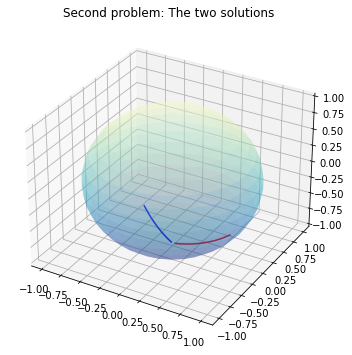

In [15]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
#r = 0.05
u, v = np.mgrid[0: 2 * np.pi: 30j, 0: np.pi: 20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap = plt.cm.YlGnBu_r,alpha=0.3)
#ax.plot_surface(x, y, z)

# ax.plot(q[0,0,:],q[0,1,:],q[0,2,:],'blue')
# ax.plot(q[1,0,:],q[1,1,:],q[1,2,:],'red')
ax.plot(qi[0,0,:],qi[0,1,:],qi[0,2,:],'blue')
ax.plot(qi[1,0,:],qi[1,1,:],qi[1,2,:],'red')
# ax.plot(qe[0,0,:],qe[0,1,:],qe[0,2,:],'blue')
# ax.plot(qe[1,0,:],qe[1,1,:],qe[1,2,:],'red')
plt.title('Second problem: The two solutions')
plt.show()

In [16]:
def symmJac(q):
    a = 1/I1
    b = 1/I2
    c = 1/I3
    h = a*q[0] + b*q[1] + c*q[2]
    hx = 2*a*q[0]
    hy = 2*b*q[1]
    hz = 2*c*q[2]
    A = np.array([[h+q[0]*hx-a, (a+b)*q[0]*q[1], (a+c)*q[0]*q[2]],
    [(a+b)*q[0]*q[1], h+q[1]*hy-b, (b+c)*q[1]*q[2]],
    [(a+c)*q[0]*q[2], (b+c)*q[1]*q[2], h+q[0]*hx-a]]).reshape(3,3)
    return A

maxEig = np.array([0])
for t in np.linspace(0,1,1000):
    eig, eigv = np.linalg.eig(symmJac(ProjS2(tmpExact[0,:,0],tmpExact[1,:,0],t)))
    if np.any(eig > maxEig):
        maxEig = np.copy(np.max(eig))

print(maxEig)

3.490092700323629
